# Сборный проект 2 "Прогнозирование оттока клиентов в сети отелей «Как в гостях»"

**Описание проекта:** сеть отелей «Как в гостях» добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. 

**Цель проекта:** разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит, который будет списан со счёта клиента, если он отменит бронь. 

**Шаги проекта:**

1. Открытие файлов с данными

2. Предобработка и исследовательский анализ данных

3. Вычисление бизнес-метрики (Оценка прибыли отеля без внедрения депозитов)

4. Разработка модели ML

* Обучение разных моделей и оценка их качества кросс-валидацией. 

* Выбор лучшей модели и проверка её на тестовой выборке.

* Оценка прибыли, которую принесёт выбранная модель за год.

5. Признаки «ненадёжного» клиента

6. общий вывод


**Описание данных**

id — номер записи;

adults — количество взрослых постояльцев;

arrival_date_year — год заезда;

arrival_date_month — месяц заезда;

arrival_date_week_number — неделя заезда;

arrival_date_day_of_month — день заезда;

babies — количество младенцев;

booking_changes — количество изменений параметров заказа;

children — количество детей от 3 до 14 лет;

country — гражданство постояльца;

customer_type — тип заказчика:

Contract — договор с юридическим лицом;

Group — групповой заезд;

Transient — не связано с договором или групповым заездом;

Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.

days_in_waiting_list — сколько дней заказ ожидал подтверждения;

distribution_channel — канал дистрибуции заказа;

is_canceled — отмена заказа;

is_repeated_guest — признак того, что гость бронирует номер второй раз;

lead_time — количество дней между датой бронирования и датой прибытия;

meal — опции заказа:

SC — нет дополнительных опций;

BB — включён завтрак;

HB — включён завтрак и обед;

FB — включён завтрак, обед и ужин.

previous_bookings_not_canceled — количество подтверждённых заказов у клиента;

previous_cancellations — количество отменённых заказов у клиента;

required_car_parking_spaces — необходимость места для автомобиля;

reserved_room_type — тип забронированной комнаты;

stays_in_weekend_nights — количество ночей в выходные дни;

stays_in_week_nights — количество ночей в будние дни;

total_nights — общее количество ночей;

total_of_special_requests — количество специальных отметок.

In [1]:
# импортируем необходимые библиотеки

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import datetime

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import recall_score

from sklearn.metrics import precision_score

from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_val_score



### Шаг 1. Откройте файлы с данными

In [2]:
# открываем файлы с данными 

hotel_train = pd.read_csv('/datasets/hotel_train.csv')

hotel_test = pd.read_csv('/datasets/hotel_test.csv')

# выведем на экран первые пять строк каждого датафрейма

display(hotel_train.head().T)

hotel_test.head().T

,0,1,2,3,4
id,0,1,2,3,4
is_canceled,0,0,0,0,1
lead_time,7.0,14.0,0.0,9.0,85.0
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,1,2,2,2,3
adults,1.0,2.0,2.0,2.0,2.0


,0,1,2,3,4
id,6086,6087,6088,6089,6090
is_canceled,1,1,1,1,1
lead_time,74.0,62.0,62.0,71.0,172.0
arrival_date_year,2017,2017,2017,2017,2017
arrival_date_month,January,January,January,January,January
arrival_date_week_number,1,1,1,1,1
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,1,2,2,2,2
stays_in_week_nights,0,2,2,2,5
adults,2.0,2.0,2.0,1.0,2.0


### Шаг 2. Предобработка и исследовательский анализ данных

In [3]:
# выведем на экран информацию о тренировочной выборке

hotel_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

Датафрейм состоит из 65 229 строк(объектов) и 25 столбцов(признаков). Пропущенных значений нет. Некоторые типы данных требуют изменений, выполним это дальше.

In [4]:
# выведем на экран информацию о тестовой выборке

hotel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

Датафрейм состоит из 32 412 строк(объектов) и 25 столбцов(признаков). Пропущенных значений нет. Некоторые типы данных требуют изменений, выполним это дальше.

In [5]:
# переведем людей и дни из float в int

hotel_train[['adults', 'lead_time', 'children', 'babies']] = hotel_train[['adults', 'lead_time', 'children', 'babies']].astype('int')

hotel_test[['adults', 'lead_time', 'children', 'babies']] = hotel_test[['adults', 'lead_time', 'children', 'babies']].astype('int')


In [6]:
# удалим столбец с ID (в нем нет необходимости)

hotel_train = hotel_train.drop(['id'], axis=1)

hotel_test = hotel_test.drop(['id'], axis=1)


In [7]:
# расчитаем размер тестовой выборки по отношению к тренировочной

def shape_test(hotel_train, hotel_test):

    shape_test = f'{hotel_test.shape[0] / hotel_train.shape[0]:.0%}'

    return shape_test


shape_test = shape_test(hotel_train, hotel_test)

shape_test

'50%'

В нашей задаче тестовая выручка представлена отдельным датафреймом, то есть, спрятана, ее размер составляет 50% от тренировочной выборки.

In [8]:
# проверим наличие явных дубликатов 

print(hotel_train.duplicated().sum())

hotel_test.duplicated().sum()

21377


7717

Дубликаты обнаружены в обоих датафреймах, вероятнее всего, они появились в связи с технической проблемой на стороне клиента или на стороне отеля (могло происходить задвоение заявок, к примеру). Удалим дубликаты.

In [9]:
# удалим явные дубликаты в обоих датафреймах

hotel_train = hotel_train.drop_duplicates().reset_index(drop=True)

hotel_test = hotel_test.drop_duplicates().reset_index(drop=True)

# проверим результат

print(hotel_train.duplicated().sum())

hotel_test.duplicated().sum()

0


0

In [10]:
# снова расчитаем размер тестовой выборки по отношению к тренировочной

shape_test_non_duble = f'{hotel_test.shape[0] / hotel_train.shape[0]:.0%}'

shape_test_non_duble

'56%'

In [11]:
# проверим статистические данные датафреймов

hotel_train.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,43852.0,0.254219,0.435426,0.0,0.0,0.0,1.0,1.0
lead_time,43852.0,67.893779,73.990715,0.0,9.0,41.0,103.0,374.0
arrival_date_year,43852.0,2015.775518,0.417246,2015.0,2016.0,2016.0,2016.0,2016.0
arrival_date_week_number,43852.0,31.091216,13.894327,1.0,20.0,33.0,43.0,53.0
arrival_date_day_of_month,43852.0,15.919274,8.859208,1.0,8.0,16.0,24.0,31.0
stays_in_weekend_nights,43852.0,0.896014,0.867677,0.0,0.0,1.0,2.0,4.0
stays_in_week_nights,43852.0,2.312141,1.454810,0.0,1.0,2.0,3.0,6.0
adults,43852.0,1.856289,0.504892,0.0,2.0,2.0,2.0,4.0
children,43852.0,0.107589,0.397146,0.0,0.0,0.0,0.0,3.0
babies,43852.0,0.010695,0.120050,0.0,0.0,0.0,0.0,10.0


**Рассмотрим статистические данные тренировочного датафрейма и отметим особенности, на которые стоит обратить внимание**:

*is_canceled — отмена заказа* - **менее половины клиентов подтверждают бронь, стоит обратить на это внимание**.

*признак lead_time — количество дней между датой бронирования и датой прибытия* имеет значения от 0 до 374 дней(т. е. иногда отель бронируют **больше, чем за год**), среднее значение в 1,5 раза больше медианы, это говорит о том, что есть **длинный хвост с высокими значениями или несколько очень больших значений**. Стоит обратить на это внимание.

*stays_in_weekend_nights- количество ночей, приходящееся на выходные дни* максимальное - 4 , при среднем и медианном показателе примерно равном 1 ночи, а в будни *stays_in_week_nights* - максимальное 6 ночей при при среднем и медианном показателе примерно равном 2 ночи.

*adults -количество взрослых человека в номере* - максимальное 4 человека, средний и медианный показатель - 2 человека.

*children - кол-во детей* - максимальное количество 3 при среднем и медианном значении, равном нулю, стандартное отклонение в 4 раза больше среднего, значит, есть **выбросы**.

*babies - кол-во младенцев* - **максимальное 10** при среднем и медианном, равном нулю, стандартное отклонение намного больше среднего, значит, есть **выбросы**.

*is_repeated_guest - бронирование во второй раз* **малое количество гостей бронируют номер второй раз**, менее 25%.

*previous_cancellations количество отмененных заказов у клиента* в среднем и по медиане - 0, но есть максимальное значение - **26 раз**.

*previous_bookings_not_canceled количество подтвержденных заказов у клиента* в среднем и по медиане 0(**то есть очень много тех, кто аннулирует бронь**), но есть максимальные значения - **58 заказов**, стандартное отклонение очень велико по сравнению со средним, это означает, что в данных **серьезные аномалии**.

*booking_changes количество изменений параметров заказа* - медиана и среднее примерно равны 0, но есть максимальное значение - **17 раз**, и стандартное отклонение намного больше среднего, что также подтверждает наличие **аномалий в данных**


*days_in_waiting_list сколько дней заказ ожидал подтверждения* - медиана равна 0, а среднее больше трех дней, максимальное значение **259 дней**, а стандартное отклонение очень велико, всё это подтверждает наличие **аномалий** в данных (возможно, **ошибка в программе?**)

*required_car_parking_spaces — необходимость места для автомобиля* - медиана и среднее на уровне нуля, но есть максимальное значение - 3, и стандартное отклонение по отношению к среднему больше, значит, **аномалии есть**

*total_of_special_requests — количество специальных отметок* - от нуля до 5, медиана ноль, а среднее 0,7, стандартное отклонение в  больше среднего, вероятно, **аномалии есть**.

*total_nights — общее количество ночей* - от 1 до 10, медиана и среднее на одном уровне - 3 ночи, аномалий, предположительно, нет.


Далее проверим выбросы и аномальные значения на диаграммах размаха и гистограммах для визуализации распределения данных.

<AxesSubplot:>

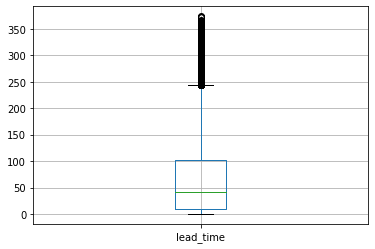

In [12]:
# построим диаграмму размаха признака - количество дней между датой бронирования и датой прибытия

hotel_train.boxplot(column='lead_time')

<AxesSubplot:>

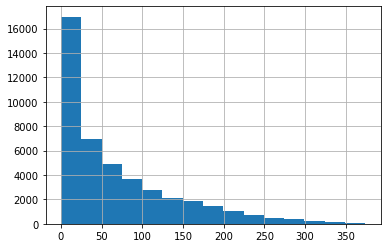

In [13]:
# построим диаграмму признака - количество дней между датой бронирования и датой прибытия

hotel_train['lead_time'].hist(bins=15)

Можем сделать вывод, что наибольшая часть бронирований (около 17 тыс из 43 852) совершается в диапазоне от 0 до 25 дней до заезда. Далее идет резкое снижение количества бронирований, а более 300 дней - это аномальные значения, предлагаем их отбросить.

In [14]:
# количество заявок, оформленных более, чем за 300 дней до въезда

hotel_train[hotel_train['lead_time'] > 300]['lead_time'].count()

486

In [15]:
# оставляем значения до 300 дней включительно

hotel_train = hotel_train[hotel_train['lead_time'] <= 300]

hotel_train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,7,2015,July,27,1,0,1,1,0,...,0,0,0,A,0,0,Transient,0,0,1
1,0,14,2015,July,27,1,0,2,2,0,...,0,0,0,A,0,0,Transient,0,1,2
2,0,0,2015,July,27,1,0,2,2,0,...,0,0,0,C,0,0,Transient,0,0,2
3,0,9,2015,July,27,1,0,2,2,0,...,0,0,0,C,0,0,Transient,0,1,2
4,1,85,2015,July,27,1,0,3,2,0,...,0,0,0,A,0,0,Transient,0,1,3


<AxesSubplot:>

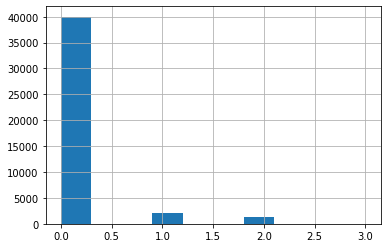

In [16]:
# построим гистограмму для признака - кол-во детей

hotel_train['children'].hist(range=(0, 3))

In [17]:
# количество заявок, в которых более 2 детей

hotel_train[hotel_train['children'] >2]['children'].count()


16

In [18]:
# отбрасываем аномальные значения (более 2 детей)

hotel_train = hotel_train[hotel_train['children'] <= 2]

<AxesSubplot:>

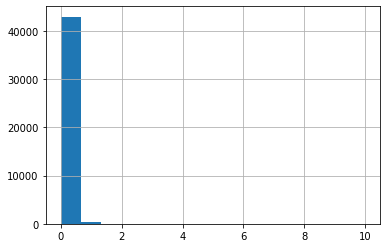

In [19]:
# посторим гистограмму для признака - кол-во младенцев

hotel_train['babies'].hist(bins=15)

In [20]:
# количество заявок, в которых более 1 младенца

hotel_train[hotel_train['babies'] > 1]['babies'].count()

5

In [21]:
# отбрасываем аномальные значения (более 1 младенца)

hotel_train = hotel_train[hotel_train['babies'] < 2]

<AxesSubplot:>

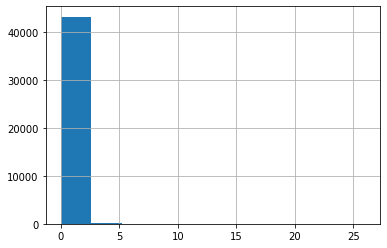

In [22]:
# построим гистограмму для признака - кол-во отмененных заказов

hotel_train['previous_cancellations'].hist(range=(0, 26))

In [23]:
# количество заявок, которые были отменены 5 раз и более

hotel_train[hotel_train['previous_cancellations'] >=5]['previous_cancellations'].count()

52

In [24]:
# оставляем значения, менее 5 дней

hotel_train = hotel_train[hotel_train['previous_cancellations'] < 5]

<AxesSubplot:>

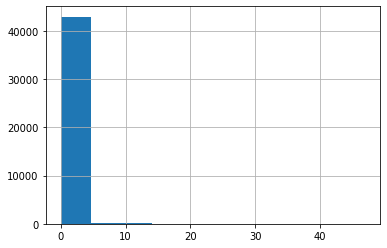

In [25]:
# построим гистограмму для признака - кол-во подтвержденных заказов

hotel_train['previous_bookings_not_canceled'].hist(bins=10)


In [26]:
# количество заявок, которые были подтверждены более 5 раз

hotel_train[hotel_train['previous_bookings_not_canceled'] > 5]['previous_bookings_not_canceled'].count()

274

In [27]:
# отбрасываем аномальные значения

hotel_train = hotel_train[hotel_train['previous_bookings_not_canceled'] <= 5]

<AxesSubplot:>

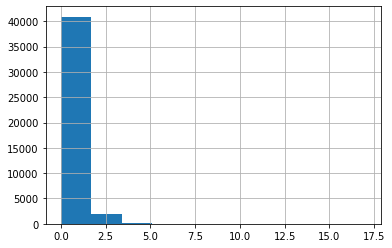

In [28]:
# построим гистограмму для признака - кол-во изменений параметров заказа

hotel_train['booking_changes'].hist(range=(0, 17))



In [29]:
# количество заявок, в которых было 4 и более изменения параметров заказа

hotel_train[hotel_train['booking_changes'] >=4]['booking_changes'].count()

233

In [30]:
# отбрасываем их

hotel_train = hotel_train[hotel_train['booking_changes'] < 4]

<AxesSubplot:>

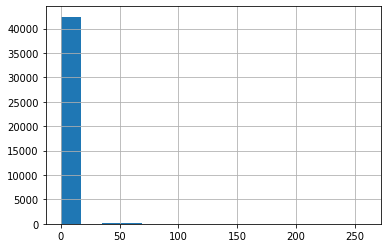

In [31]:
# построим гистограмму для признака - сколько дней заказ оиждал подтверждения

hotel_train['days_in_waiting_list'].hist(bins=15)



In [32]:
# количество заявок с ожиданием 20  дней и более

hotel_train[hotel_train['days_in_waiting_list'] >= 20]['days_in_waiting_list'].count()

363

In [33]:
# отбрасываем аномальные значения

hotel_train = hotel_train[hotel_train['days_in_waiting_list'] < 20]

<AxesSubplot:>

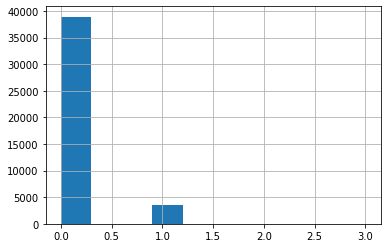

In [34]:
# построим гистограмму для признака - необходимость места для автомобиля

hotel_train['required_car_parking_spaces'].hist(range=(0,3))

 

In [35]:
# кол-во заявок, в которых нужно 2 и более мест для авто

hotel_train[hotel_train['required_car_parking_spaces'] >=2]['required_car_parking_spaces'].count()

11

In [36]:
# отбрасываем

hotel_train = hotel_train[hotel_train['required_car_parking_spaces'] < 2]

<AxesSubplot:>

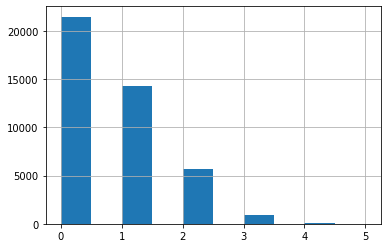

In [37]:
# построим гистограмму для признака - количество специальных отметок

hotel_train['total_of_special_requests'].hist(range=(0, 5))



In [38]:
# количество заявок с 4 и более спец меток

hotel_train[hotel_train['total_of_special_requests'] >=4]['total_of_special_requests'].count()

100

In [39]:
# отбрасываем аномальные значения

hotel_train = hotel_train[hotel_train['total_of_special_requests'] < 4]

In [40]:
# проверяем, есть ли бронирования, в которых количество взрослых равно 0

hotel_train[hotel_train['adults'] == 0]['adults'].count() 

153

In [41]:
# отбрасываем эти значения

hotel_train = hotel_train[hotel_train['adults'] != 0]

In [42]:
hotel_train.shape

(42159, 24)

За счет аномальных значений атафрейм hotel_train сократили примерно на 5% , в дальнейшем уберем отбросы и в тестовой таблице, для начала проверим статистические данные hotel_test.

In [43]:
# проверим статистические данные датафрейма hotel_test

hotel_test.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,24695.0,0.315246,0.464623,0.0,0.0,0.0,1.0,1.0
lead_time,24695.0,88.834541,85.506551,0.0,16.0,63.0,143.0,373.0
arrival_date_year,24695.0,2017.000000,0.000000,2017.0,2017.0,2017.0,2017.0,2017.0
arrival_date_week_number,24695.0,18.192833,9.438886,1.0,10.0,18.0,26.0,35.0
arrival_date_day_of_month,24695.0,15.579348,8.776695,1.0,8.0,15.0,23.0,31.0
stays_in_weekend_nights,24695.0,0.910306,0.859874,0.0,0.0,1.0,2.0,4.0
stays_in_week_nights,24695.0,2.379186,1.426038,0.0,1.0,2.0,3.0,6.0
adults,24695.0,1.887265,0.495552,0.0,2.0,2.0,2.0,4.0
children,24695.0,0.106054,0.384630,0.0,0.0,0.0,0.0,3.0
babies,24695.0,0.007208,0.086488,0.0,0.0,0.0,0.0,2.0


**Рассмотрим статистические данные треестового датафрейма и отметим особенности, на которые стоит обратить внимание**:


*is_canceled — отмена заказа* - **менее половины клиентов подтверждают бронь, стоит обратить на это внимание**.

*признак lead_time — количество дней между датой бронирования и датой прибытия* имеет значения от 0 до 373 дней(т. е. иногда отель бронируют **больше, чем за год**), среднее значение на 30% больше медианы, это говорит о том, что,возможно, присутствуют **несколько очень больших значений**. Стоит обратить на это внимание.

*stays_in_weekend_nights- количество ночей, приходящееся на выходные дни* максимальное - 4 , при среднем и медианном показателе примерно равном 1 ночи, а в будни *stays_in_week_nights* - максимальное 6 ночей при при среднем и медианном показателе примерно равном 2 ночи.

*adults -количество взрослых человека в номере* - максимальное 4 человека, средний и медианный показатель - 2 человека.

*children - количество детей* - максимальное 3 при среднем и медианном, равном нулю, стандартное отклонение намного превышает среднее, вероятно, есть **выбросы**.

*babies - количество младенцев* - от 0 до 2 при среднем и медианном, равном нулю, стандартное отклонение намного превышает среднее, вероятно, есть **выбросы**

*is_repeated_guest - бронирование во второй раз* малое количество гостей бронируют номер второй раз, менее 25%.

*previous_cancellations количество отмененных заказов у клиента* в среднем и по медиане - 0, но есть максимальное значение - **6 раз**.

*previous_bookings_not_canceled количество подтвержденных заказов у клиента* в среднем и по медиане 0(**то есть очень много тех, кто аннулирует бронь**), но есть максимальные значения - **72 заказов**, стандартное отклонение очень велико по сравнению со средним, это означает, что в данных **серьезные аномалии**.

*booking_changes количество изменений параметров заказа* - медиана и среднее примерно равны 0, но есть максимальное значение - **18 раз**, и стандартное отклонение намного больше среднего, что также подтверждает наличие **аномалий**


*days_in_waiting_list сколько дней заказ ожидал подтверждения* - медиана и среднее на уровне нуля, максимальное значение **223 дня**, а стадартное отклонение очень велико, всё это подтверждает наличие **аномалий** в данных (возможно, **ошибка в программе?**)

*required_car_parking_spaces — необходимость места для автомобиля* - медиана и среднее на уровне нуля, но есть **максимальное значение - 8**, и стандартное отклонение по отношению к среднему больше, значит, **аномалии есть**

*total_of_special_requests — количество специальных отметок* - от нуля до 5, медиана ноль, а среднее 0,76, стандартное отклонение  больше среднего, вероятно, **аномалии есть**.

*total_nights — общее количество ночей* - от 1 до 10, медиана и среднее на одном уровне около трех ночей, аномалий, предположительно, нет.

по сравнению с тренировочным датафреймом, есть несколько различий: отмененных заказов в тестовом - 6, а в тренировочном - 26, необходимость места для автомобиля - 8, а в тренировочном - 3. 

<AxesSubplot:>

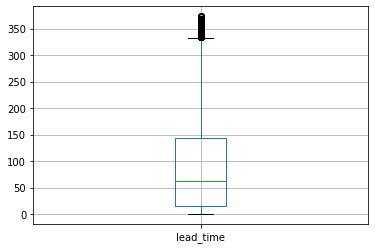

In [44]:
# построим диаграмму размаха признака - количество дней между датой бронирования и датой прибытия

hotel_test.boxplot(column='lead_time')

<AxesSubplot:>

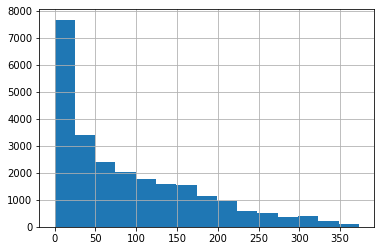

In [45]:
# построим диаграмму признака - количество дней между датой бронирования и датой прибытия

hotel_test['lead_time'].hist(bins=15)

Можем сделать вывод, что наибольшая часть бронирований (более 7,5 тыс из 24 695) совершается в диапазоне от 0 до 25 дней до заезда. Далее идет резкое снижение количества бронирований, а меньше 330 дней - это аномальные значения, предлагаем их отбросить.

In [46]:
hotel_test = hotel_test[hotel_test['lead_time'] < 330]

<AxesSubplot:>

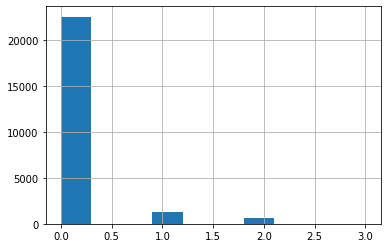

In [47]:
# построим гистограмму для признака - кол-во детей

hotel_test['children'].hist(range=(0, 3))

In [48]:
# отбрасываем значений более 2 ребенка

hotel_test = hotel_test[hotel_test['children'] <= 2]

<AxesSubplot:>

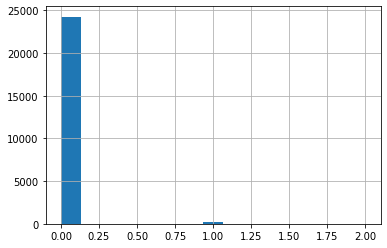

In [49]:
# посторим гистограмму для признака - кол-во младенцев

hotel_test['babies'].hist(bins=15)

In [50]:
# отбрасываем значения, более 1 младенца

hotel_test = hotel_test[hotel_test['babies'] < 2]

<AxesSubplot:>

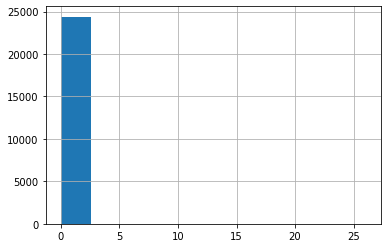

In [51]:
# построим гистограмму для признака - кол-во отмененных заказов

hotel_test['previous_cancellations'].hist(range=(0, 26))

In [52]:
# количество заявок с кол-вом отмененных заказов 3 и более

hotel_test[hotel_test['previous_cancellations'] >=3]['previous_cancellations'].count()

32

In [53]:
# отбрасываем аномальные значения

hotel_test = hotel_test[hotel_test['previous_cancellations'] <3]

<AxesSubplot:>

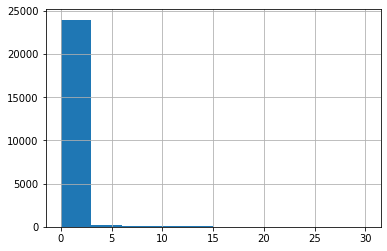

In [54]:
# построим гистограмму для признака - кол-во подтвержденных заказов

hotel_test['previous_bookings_not_canceled'].hist(bins=10)


In [55]:
# кол-во заявок с количеством подтвержденных заказов  3 и более

hotel_test[hotel_test['previous_bookings_not_canceled'] >= 3]['previous_bookings_not_canceled'].count()

432

In [56]:
# отбрасываем

hotel_test = hotel_test[hotel_test['previous_bookings_not_canceled'] < 3]

<AxesSubplot:>

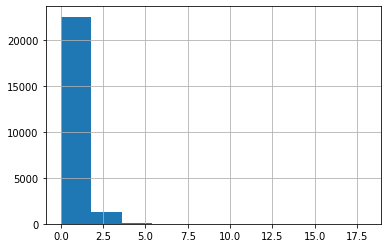

In [57]:
# построим гистограмму для признака - кол-во изменений параметров заказа

hotel_test['booking_changes'].hist(range=(0, 18))


In [58]:
# количество заявок с количеством изменений в заказе 4 и более

hotel_test[hotel_test['booking_changes'] >= 4]['booking_changes'].count()

154

In [59]:
# отбрасываем аномальные значения

hotel_test = hotel_test[hotel_test['booking_changes'] < 4]

<AxesSubplot:>

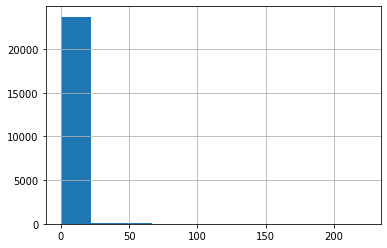

In [60]:
# построим гистограмму для признака - сколько дней заказ ожидал подтверждения

hotel_test['days_in_waiting_list'].hist(bins=10)

In [61]:
# кол-во заказов, ожидающих подтверждения 30 и более дней

hotel_test[hotel_test['days_in_waiting_list'] >= 30]['days_in_waiting_list'].count()

91

In [62]:
# оставляем заказы, ожидающие менее 30 дней

hotel_test = hotel_test[hotel_test['days_in_waiting_list'] < 30]

<AxesSubplot:>

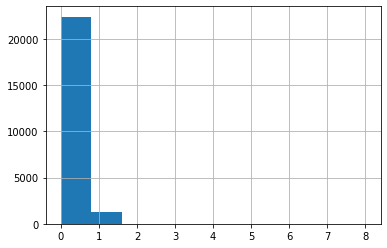

In [63]:
# построим гистограмму для признака - необходимость места для автомобиля

hotel_test['required_car_parking_spaces'].hist(range=(0,8))

In [64]:
# кол-во заявок с кол-вом автомобилей 2 и более

hotel_test[hotel_test['required_car_parking_spaces'] >=2]['required_car_parking_spaces'].count()

8

In [65]:
# отбрасываем

hotel_test = hotel_test[hotel_test['required_car_parking_spaces'] < 2]

<AxesSubplot:>

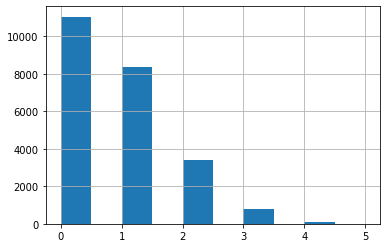

In [66]:
# построим гистограмму для признака - количество специальных отметок

hotel_test['total_of_special_requests'].hist(range=(0, 5))

In [67]:
# кол-во заявок с кол-вом спец отметок  более 4

hotel_test[hotel_test['total_of_special_requests'] > 4]['total_of_special_requests']. count()

12

In [68]:
# оставляем 4 и менее 4

hotel_test = hotel_test[hotel_test['total_of_special_requests'] <= 4]

In [69]:
# отбросим заявки, в которых количество взрослых равно 0

hotel_test = hotel_test[hotel_test['adults'] != 0]

In [70]:
# размеры тестовой таблицы, подготовленной для работы

hotel_test.shape

(23643, 24)

In [71]:
# расчитаем размер тестовой выборки по отношению к тренировочной после удаления аномальных значений

shape_test_clean = f'{hotel_test.shape[0] / hotel_train.shape[0]:.0%}'

shape_test_clean


'56%'

Мы сохранили пропорцию размера тестовой выручки к обучающей.

<AxesSubplot:>

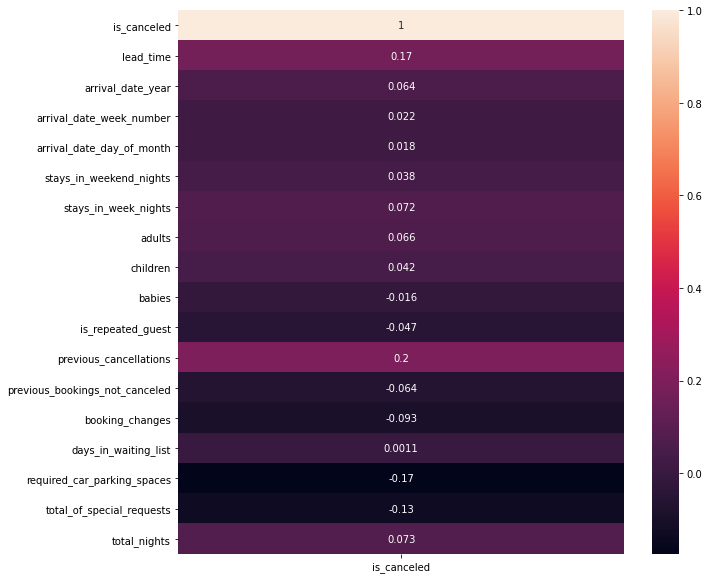

In [72]:
# построим тепловую карту, чтобы определить наличие зависимостей признаков в тренировочном датафрейме

fig, ax = plt.subplots(figsize=(10, 10))


upp_mat = np.triu(hotel_train.corr())

mask = upp_mat

sns.heatmap(hotel_train.corr()[['is_canceled']], annot=True)

Построив тепловую карту, мы видим, что значительных зависимостей отмены брони нет ни с одним признаком, однако, стоит выделить признак previous_cancellations (**кол-во отмененных заказов**) и  lead_time (**количество дней между датой бронирования и датой прибытия**), эти признаки более, чем остальные, оказывают влияние на целевой признак "отмена брони", а также признак required_car_parking_spaces — **необходимость места для автомобиля** - оказывает небольшое обратное влияние на целевой показатель.

<AxesSubplot:>

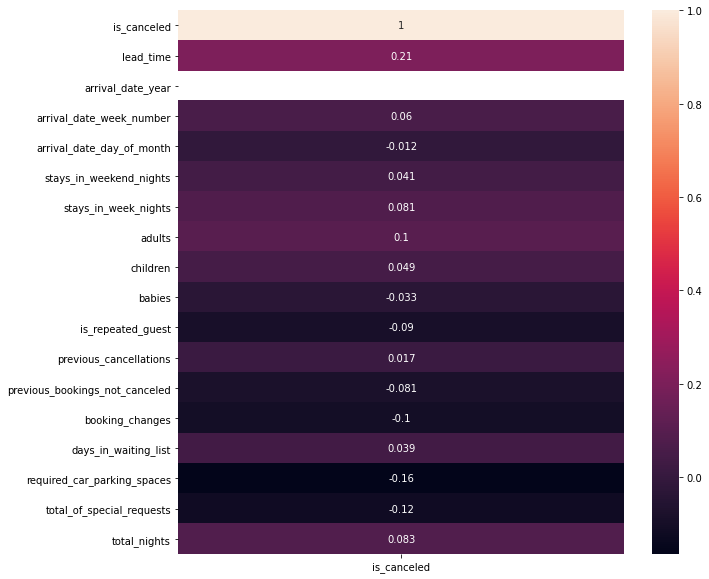

In [73]:
# построим тепловую карту, чтобы определить наличие зависимостей признаков в тестовом датафрейме

fig, ax = plt.subplots(figsize=(10, 10))


upp_mat = np.triu(hotel_test.corr())

mask = upp_mat

sns.heatmap(hotel_test.corr()[['is_canceled']], annot=True)

Построив тепловую карту по тестовому датафрейму, ситуация немного другая: lead_time (**количество дней между датой бронирования и датой прибытия**) оказывает небольшое прямое влияние на целевой признак "отмена брони", а также признак required_car_parking_spaces — **необходимость места для автомобиля** - оказывает небольшое обратное влияние на целевой показатель. При этом значительных зависимостей отмены брони нет ни с одним признаком.

 **Вывод:** мы обработали вводные данные и провели исследовательский анализ данных: проверили наличие пропущенных значений, дубликатов, аномальных значений, удалили лишние данные, подготовили их к разработке модели.

In [74]:
# проверим совпадает ли суммарное кол-во ночей сумме ночей в будни и выходные дни в обоих датафреймах

print(hotel_train['total_nights'].sum())

print(hotel_train['stays_in_week_nights'].sum() + hotel_train['stays_in_weekend_nights'].sum())


print(hotel_test['total_nights'].sum())

print(hotel_test['stays_in_week_nights'].sum() + hotel_test['stays_in_weekend_nights'].sum())

135165
135165
78106
78106


In [75]:
# удалим лишние столбцы

hotel_train = hotel_train.drop(['stays_in_week_nights', 'stays_in_weekend_nights', 'is_repeated_guest', 'arrival_date_year', 'arrival_date_week_number'], axis=1)

hotel_test = hotel_test.drop(['stays_in_week_nights', 'stays_in_weekend_nights', 'is_repeated_guest', 'arrival_date_year', 'arrival_date_week_number'], axis=1)


### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

Оценим прибыль отеля без внедрения депозитов.

In [76]:
# для информации стоимость и затраты с разбивкой по категориям номеров:

# категория B: за ночь — 800, разовое обслуживание — 350;
# категория C: за ночь — 600, разовое обслуживание — 350;
# категория D: за ночь — 550, разовое обслуживание — 150;
# категория E: за ночь — 500, разовое обслуживание — 150;
# категория F: за ночь — 450, разовое обслуживание — 150;
# категория G: за ночь — 350, разовое обслуживание — 150.


# запишем в переменные константы

PRICE_ROOM_A = 1000

COST_SERVICE_A = 400

PRICE_ROOM_B = 800

COST_SERVICE_B = 350

PRICE_ROOM_C = 600

COST_SERVICE_C = 350

PRICE_ROOM_D = 550

COST_SERVICE_D = 150

PRICE_ROOM_E = 500

COST_SERVICE_E = 150

PRICE_ROOM_F = 450

COST_SERVICE_F = 150

PRICE_ROOM_G = 350

COST_SERVICE_G = 150

# В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.

K_SPRING_AUTUMN = 1.2

K_SUMMER = 1.4

BUDGET = 400_000




In [77]:
# подготовим датафреймы с необходимыми столбцами для расчета прибыли

hotel_test_profit = hotel_test[['arrival_date_month', 'is_canceled', 'reserved_room_type', 'total_nights']]

hotel_train_profit = hotel_train[['arrival_date_month', 'is_canceled', 'reserved_room_type', 'total_nights']]

In [78]:
# подготовим функцию, которая будет считать сезонный коэффициент

def coefficient(row):
    
    summer = ['June', 'July', 'August']
    
    spring_autumn = ['March', 'April', 'May', 'September', 'October', 'November']
    
    
    if row in summer:
        
        return K_SUMMER
    
    elif row in spring_autumn:
        
        return K_SPRING_AUTUMN
    
    else:
        
        return 1
    
# добавляем столбец с коэффициентом
    
hotel_train_profit['coefficient'] = hotel_train_profit['arrival_date_month'].apply(coefficient)

hotel_train_profit.head(5)



/tmp/ipykernel_71/532959933.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_train_profit['coefficient'] = hotel_train_profit['arrival_date_month'].apply(coefficient)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient
0,July,0,A,1,1.4
1,July,0,A,2,1.4
2,July,0,C,2,1.4
3,July,0,C,2,1.4
4,July,1,A,3,1.4


In [79]:
# в тестовый датафрейм также добавляем столбец

hotel_test_profit['coefficient'] = hotel_test_profit['arrival_date_month'].apply(coefficient)

hotel_test_profit.head(5)

/tmp/ipykernel_71/104221927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_test_profit['coefficient'] = hotel_test_profit['arrival_date_month'].apply(coefficient)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient
0,January,1,A,1,1.0
1,January,1,A,4,1.0
2,January,1,A,4,1.0
3,January,1,A,7,1.0
4,January,1,A,7,1.0


In [80]:
# подготовим функцию, которая расчитает количество уборок, необходимое за весь период проживания

def cleaning(row):
    
    cleaning = 1 + row // 2
    
    return cleaning


# добавляем столбец

hotel_train_profit['cleaning'] = hotel_train_profit['total_nights'].apply(cleaning)

hotel_train_profit.head(5)

/tmp/ipykernel_71/733278060.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_train_profit['cleaning'] = hotel_train_profit['total_nights'].apply(cleaning)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning
0,July,0,A,1,1.4,1
1,July,0,A,2,1.4,2
2,July,0,C,2,1.4,2
3,July,0,C,2,1.4,2
4,July,1,A,3,1.4,2


In [81]:
hotel_test_profit['cleaning'] = hotel_test_profit['total_nights'].apply(cleaning).apply(np.ceil)

hotel_test_profit.head()

/tmp/ipykernel_71/3514738106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_test_profit['cleaning'] = hotel_test_profit['total_nights'].apply(cleaning).apply(np.ceil)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning
0,January,1,A,1,1.0,1.0
1,January,1,A,4,1.0,3.0
2,January,1,A,4,1.0,3.0
3,January,1,A,7,1.0,4.0
4,January,1,A,7,1.0,4.0


In [82]:
# подготавливаем функцию, которая вернет стоимость за номер в зависимости от категории

def price_room(row):
    
    if 'A' in row:
        
        price_room = PRICE_ROOM_A
        
        return price_room
    
    if 'B' in row:
        
        price_room = PRICE_ROOM_B
        
        return price_room
    
    if 'C' in row:
        
        price_room = PRICE_ROOM_C
        
        return price_room
    
    if 'D' in row:
        
        price_room = PRICE_ROOM_D
        
        return price_room
    
    if 'E' in row:
        
        price_room = PRICE_ROOM_E
        
        return price_room
    
    if 'F' in row:
        
        price_room = PRICE_ROOM_F
        
        return price_room
    
    if 'G' in row:
        
        price_room = PRICE_ROOM_G
        
        return price_room
        
# добавляем столбец    
    
hotel_train_profit['price_room'] = hotel_train_profit['reserved_room_type'].apply(price_room)

hotel_train_profit.head(5)

/tmp/ipykernel_71/3544219712.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_train_profit['price_room'] = hotel_train_profit['reserved_room_type'].apply(price_room)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning,price_room
0,July,0,A,1,1.4,1,1000
1,July,0,A,2,1.4,2,1000
2,July,0,C,2,1.4,2,600
3,July,0,C,2,1.4,2,600
4,July,1,A,3,1.4,2,1000


In [83]:
hotel_test_profit['price_room'] = hotel_test_profit['reserved_room_type'].apply(price_room)

hotel_test_profit.head(5)

/tmp/ipykernel_71/766662992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_test_profit['price_room'] = hotel_test_profit['reserved_room_type'].apply(price_room)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning,price_room
0,January,1,A,1,1.0,1.0,1000
1,January,1,A,4,1.0,3.0,1000
2,January,1,A,4,1.0,3.0,1000
3,January,1,A,7,1.0,4.0,1000
4,January,1,A,7,1.0,4.0,1000


In [84]:
# считаем стоимость одной уборки в зависимости от категории номера

def cost_service(row):
    
    if 'A' in row:
        
        cost_service = COST_SERVICE_A
        
        return cost_service
    
    if 'B' in row:
        
        cost_service = COST_SERVICE_B
        
        return cost_service
    
    if 'C' in row:
        
        cost_service = COST_SERVICE_C
        
        return cost_service
    
    if 'D' in row:
        
        cost_service = COST_SERVICE_D
        
        return cost_service
    
    if 'E' in row:
        
        cost_service = COST_SERVICE_E
        
        return cost_service
    
    if 'F' in row:
        
        cost_service = COST_SERVICE_F
        
        return cost_service
    
    if 'G' in row:
        
        cost_service = COST_SERVICE_G
        
        return cost_service
        
# добавляем столбец    
    
hotel_train_profit['cost_service'] = hotel_train_profit['reserved_room_type'].apply(cost_service)

hotel_train_profit.head(5)
    

/tmp/ipykernel_71/457987318.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_train_profit['cost_service'] = hotel_train_profit['reserved_room_type'].apply(cost_service)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning,price_room,cost_service
0,July,0,A,1,1.4,1,1000,400
1,July,0,A,2,1.4,2,1000,400
2,July,0,C,2,1.4,2,600,350
3,July,0,C,2,1.4,2,600,350
4,July,1,A,3,1.4,2,1000,400


In [85]:
hotel_test_profit['cost_service'] = hotel_test_profit['reserved_room_type'].apply(cost_service)

hotel_test_profit.head(5)

/tmp/ipykernel_71/107956882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_test_profit['cost_service'] = hotel_test_profit['reserved_room_type'].apply(cost_service)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning,price_room,cost_service
0,January,1,A,1,1.0,1.0,1000,400
1,January,1,A,4,1.0,3.0,1000,400
2,January,1,A,4,1.0,3.0,1000,400
3,January,1,A,7,1.0,4.0,1000,400
4,January,1,A,7,1.0,4.0,1000,400


In [86]:
# функция, которая расчитает убытки при отмене брони

def loss(row):
    
    loss = (row['price_room'] * row['coefficient'] + row['cost_service']) * row['is_canceled']
    
    return loss

# добавляем столбец

hotel_train_profit['loss'] = hotel_train_profit.apply(loss, axis=1)

hotel_train_profit.head(5)

/tmp/ipykernel_71/3708327677.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_train_profit['loss'] = hotel_train_profit.apply(loss, axis=1)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning,price_room,cost_service,loss
0,July,0,A,1,1.4,1,1000,400,0.0
1,July,0,A,2,1.4,2,1000,400,0.0
2,July,0,C,2,1.4,2,600,350,0.0
3,July,0,C,2,1.4,2,600,350,0.0
4,July,1,A,3,1.4,2,1000,400,1800.0


In [87]:
hotel_test_profit['loss'] = hotel_test_profit.apply(loss, axis=1)

hotel_test_profit.head(5)

/tmp/ipykernel_71/3661546942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_test_profit['loss'] = hotel_test_profit.apply(loss, axis=1)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning,price_room,cost_service,loss
0,January,1,A,1,1.0,1.0,1000,400,1400.0
1,January,1,A,4,1.0,3.0,1000,400,1400.0
2,January,1,A,4,1.0,3.0,1000,400,1400.0
3,January,1,A,7,1.0,4.0,1000,400,1400.0
4,January,1,A,7,1.0,4.0,1000,400,1400.0


In [88]:
# функция для расчета прибыли

def profit(row):
    
    if row['is_canceled'] == 0:
    
        profit = (row['price_room'] * row['total_nights'] * row['coefficient']) - (row['cost_service'] * row['cleaning'])
        
        return profit
    
    return 0

# добавляем столбец

hotel_train_profit['profit'] = hotel_train_profit.apply(profit, axis=1)

hotel_train_profit.head(5)

/tmp/ipykernel_71/206310411.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_train_profit['profit'] = hotel_train_profit.apply(profit, axis=1)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning,price_room,cost_service,loss,profit
0,July,0,A,1,1.4,1,1000,400,0.0,1000.0
1,July,0,A,2,1.4,2,1000,400,0.0,2000.0
2,July,0,C,2,1.4,2,600,350,0.0,980.0
3,July,0,C,2,1.4,2,600,350,0.0,980.0
4,July,1,A,3,1.4,2,1000,400,1800.0,0.0


In [89]:
hotel_test_profit['profit'] = hotel_test_profit.apply(profit, axis=1)

hotel_test_profit.head(5)

/tmp/ipykernel_71/2470620630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_test_profit['profit'] = hotel_test_profit.apply(profit, axis=1)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning,price_room,cost_service,loss,profit
0,January,1,A,1,1.0,1.0,1000,400,1400.0,0.0
1,January,1,A,4,1.0,3.0,1000,400,1400.0,0.0
2,January,1,A,4,1.0,3.0,1000,400,1400.0,0.0
3,January,1,A,7,1.0,4.0,1000,400,1400.0,0.0
4,January,1,A,7,1.0,4.0,1000,400,1400.0,0.0


In [90]:
# прибыль отеля без внедрения депозита на тренировочной выборке

hotel_train_profit_sum = hotel_train_profit['profit'].sum() - hotel_train_profit['loss'].sum()

hotel_train_profit_sum

63940770.0

In [91]:
# прибыль отеля без внедрения депозита на тестовой выборке

hotel_test_profit_sum = hotel_test_profit['profit'].sum() - hotel_test_profit['loss'].sum()

hotel_test_profit_sum

31408190.0

По результатам расчетов: прибыль отеля без внедрения депозита на тренировочной выборке составляет 63_940 _770 руб, а на тестовой 31_408_190 руб.

### Шаг 4. Разработка модели ML

Обучим разные модели и оценим их качество кросс-валидацией. 

Целевой показатель - отмена брони is_canceled, если 0 - заказ подтвержден, если 1 - заказ отменен. Наш целевой признак категориальный, значит имеем дело с бинарной классификацией.

In [92]:
# применим технику OrdinalEncoder() для кодирования признаков

encoder = OrdinalEncoder()

encoder.fit(hotel_train)

data_hotel_train = pd.DataFrame(encoder.transform(hotel_train), columns=hotel_train.columns)

encoder_1 = OrdinalEncoder()

encoder_1.fit(hotel_test)

data_hotel_test = pd.DataFrame(encoder_1.transform(hotel_test), columns=hotel_test.columns)

In [93]:
display(data_hotel_train.head())

data_hotel_test.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,distribution_channel,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1,0.0,14.0,5.0,0.0,1.0,0.0,0.0,0.0,50.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
2,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,117.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0
3,0.0,9.0,5.0,0.0,1.0,0.0,0.0,1.0,117.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0
4,1.0,85.0,5.0,0.0,1.0,0.0,0.0,0.0,117.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0


,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,distribution_channel,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,1.0,74.0,3.0,0.0,1.0,0.0,0.0,0.0,107.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1.0,62.0,3.0,0.0,1.0,0.0,0.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0
2,1.0,71.0,3.0,0.0,0.0,0.0,0.0,0.0,107.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0
3,1.0,172.0,3.0,0.0,1.0,0.0,0.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0
4,1.0,52.0,3.0,0.0,0.0,0.0,0.0,0.0,33.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0


In [94]:
# разделим датафреймы на признаки и целевой признак

features = data_hotel_train.drop(['is_canceled'], axis=1)

target = data_hotel_train['is_canceled']

features_test = data_hotel_test.drop(['is_canceled'], axis=1)

target_test = data_hotel_test['is_canceled']


In [95]:
# перед обучением модели проверим адекватность

# проверим сбалансированность классов

class_frequency = hotel_train['is_canceled'].value_counts(normalize=True)

class_frequency

0    0.746792
1    0.253208
Name: is_canceled, dtype: float64

Классы не сбалансированны, клиентов, подтвердивших бронь в 3 раза больше, чем аннулировавших.

In [96]:
# придадим объектам редкого класса бОльший вес и обучим модель дерева решений

model_dt = DecisionTreeClassifier(random_state=0, class_weight = 'balanced')

model_dt = model_dt.fit(features, target)


В связи с тем, что модель будет предсказывать отмену брони не идеально, то для корректного расчета прибыли после внедрения модели, нужно одновременно учитывать факт отмены и предсказания модели. В нашем случае, нам нужна модель, уменьшающая убытки в случае отказа от брони. Поэтому, депозит мы получим в случае получения истинноположительных предсказаний (то есть модель правильно нам предскажет, что клиент откажется от брони, таким образом, отель получит депозит, тем самым уменьшив убыток на 80%. При других соотношениях факта отмены и предсказания - уменьшить убыток не удастся.
    Нам нужно получить как можно больше истинноположительных результов и как можно меньше ложноположительных. Метрика, оценивающая эти характеристики - полнота. Полнота покажет нам долю истинноположительных предсказаний среди всех положительных.
    Оценивать качество модели будем по метрике - RECALL Полнота.
 

In [97]:
# кросс-валидацией оценим качество модели дерева решений

scores_dt = cross_val_score(model_dt, features, target, cv=5, scoring = "recall")

final_score_dt = scores_dt.mean()

print('Средняя оценка качества модели дерева решений:', final_score_dt)

Средняя оценка качества модели дерева решений: 0.28721311475409833


In [98]:
# обучим модель логистической регрессии

model_lr = LogisticRegression(random_state=0, solver='liblinear', class_weight = 'balanced')

model_lr = model_lr.fit(features, target)


In [99]:
# обучим модель случайного леса

model_rf = RandomForestClassifier(random_state=0, class_weight = 'balanced')

model_rf = model_rf.fit(features, target)

In [100]:
# создадим функцию для расчета средней оценки качества модели (ПОЛНОТЫ) с помощью кросс-валидации

def final_score(model, n):
    
    scores = cross_val_score(model, features, target, cv=5, scoring = "recall")

    final_score = scores.mean()
    
    print(f'Средняя оценка качества (ПОЛНОТЫ) модели {n}:', final_score)
    

In [101]:
# с помощью функции расчитаем показатель качества модели логистичекской регрессии

final_score_lr = final_score(model_lr, 'логистическая регрессия')

final_score_lr

Средняя оценка качества (ПОЛНОТЫ) модели логистическая регрессия: 0.6606088992974237


In [102]:
# также модели случайного леса

final_score_rf = final_score(model_rf, 'случайный лес')

final_score_rf

Средняя оценка качества (ПОЛНОТЫ) модели случайный лес: 0.24777517564402812


Модель логистической регрессии имеет хороший показатель качества (ПОЛНОТЫ), и он выше показателя остальных моделей. Попробуем улучшить модели подбором гиперпараметров.

In [103]:
# для модели дерева решений в цикле переберем различную глубину дерева от 1 до 30, и выберем лучшую модель

best_model_tree = None

best_result = 0

best_depth = 0

for depth in range (1, 31):
        
        model_tree = DecisionTreeClassifier(random_state=0, class_weight = 'balanced', max_depth=depth, criterion = 'gini')
    
        scores_tree = cross_val_score(model_tree, features, target, cv=5, scoring = "recall")

        result_tree = scores_tree.mean()
    
        if result_tree > best_result:
        
            best_model_tree = model_tree
            
            best_result = result_tree
            
            best_depth = depth
            
print('Средняя оценка качества (ПОЛНОТЫ) наилучшей модели дерева решений:', best_result)

print('Глубина дерева наилучшей модели дерева решений:', best_depth)

Средняя оценка качества (ПОЛНОТЫ) наилучшей модели дерева решений: 0.9207494145199064
Глубина дерева наилучшей модели дерева решений: 1


Показатель полноты увеличился очень сильно, а глубина дерева совсем мала, это говорит о том, что модель недообучилась.

In [104]:
# для модели случайного леса в цикле переберем различное количество деревьев от 1 до 50 и глубину дерева от 1 до 20, и выберем лучшую модель

best_model_forest = None

best_result = 0

best_est = 0

best_depth = 0

for est in range(1, 51):
    
    for depth in range (1, 21):
    
        model_forest = RandomForestClassifier(random_state=0, n_estimators=est, max_depth=depth, class_weight = 'balanced')
    
        scores = cross_val_score(model_forest, features, target, cv=5, scoring = "recall")

        result = scores.mean()
    
        if result > best_result:
        
            best_model_forest = model_forest
        
            best_result = result
        
            best_est = est
            
            best_depth = depth
            
print('Средняя оценка качества (ПОЛНОТЫ) наилучшей модели случайного леса решений:', best_result)

print('Количество деревьев наилучшей модели случайного леса:', best_est)

print('Глубина дерева наилучшей модели случайного леса решений:', best_depth)


Средняя оценка качества (ПОЛНОТЫ) наилучшей модели случайного леса решений: 0.8808430913348946
Количество деревьев наилучшей модели случайного леса: 5
Глубина дерева наилучшей модели случайного леса решений: 1


Модель случайного леса также имеет совсем минимальную глубину дерева, это говорит о том, что модель недообучилась. Переходим к модели логистической регрессии.

In [105]:
best_model_lr = None

best_result = 0

best_max_iter = 0
            
best_solver = 0

max_iter = [20, 50, 100]                      

solvers = ['newton-cg', 'lbfgs', 'liblinear']  
        
for iter in max_iter:
            
    for solverid in solvers:
                
        model_lr_variant =  LogisticRegression(random_state=0, class_weight = 'balanced', max_iter=iter, solver=solverid)
            
        scores = cross_val_score(model_lr_variant, features, target, cv=5, scoring = "recall")

        result = scores.mean()
            
        if result > best_result:
        
            best_model_lr = model_lr_variant
        
            best_result = result
        
            best_max_iter = iter
            
            best_solver = solverid
            
print('Средняя оценка полноты наилучшей модели логистической регрессии:', best_result)

print('Количество итераций наилучшей модели логистической регрессии:', best_max_iter)

print('Алгоритм лучшей модели логистической регрессии:', best_solver)



/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the

Средняя оценка полноты наилучшей модели логистической регрессии: 0.6606088992974237
Количество итераций наилучшей модели логистической регрессии: 50
Алгоритм лучшей модели логистической регрессии: liblinear


Результат оценки полноты на хорошем уровне, именно, с этими гиперпараметрами и будем использовать модель.

In [106]:
# проводим финальное тестирование лучшей модели и рассчитаем итоговую метрику на тестовой выборке

best_model = LogisticRegression(random_state=0, class_weight = 'balanced', max_iter=50, solver='liblinear')

best_model.fit(features, target)

predicted_best_model = best_model.predict(features_test)

recall_best_model = recall_score(target_test, predicted_best_model)

print('Полнота лучшей модели на тестовой выборке:', recall_best_model)

Полнота лучшей модели на тестовой выборке: 0.6764431409145447


Показатель полноты на тестовой модели имеет также хороший показатель, немного выше, чем на тренировочной модели. Значит, модель проверку прошла.

In [107]:
# добавим в тестовый датафрейм с прибылью столбец с предсказаниями

hotel_test_profit['test_is_canceled'] = pd.Series(predicted_best_model)

hotel_test_profit.head()

/tmp/ipykernel_71/1051480133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_test_profit['test_is_canceled'] = pd.Series(predicted_best_model)


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning,price_room,cost_service,loss,profit,test_is_canceled
0,January,1,A,1,1.0,1.0,1000,400,1400.0,0.0,1.0
1,January,1,A,4,1.0,3.0,1000,400,1400.0,0.0,0.0
2,January,1,A,4,1.0,3.0,1000,400,1400.0,0.0,0.0
3,January,1,A,7,1.0,4.0,1000,400,1400.0,0.0,1.0
4,January,1,A,7,1.0,4.0,1000,400,1400.0,0.0,0.0


Для корректного расчета прибыли после внедрения модели, нужно одновременно учитывать факт отмены и предсказания модели. Чтобы не запутаться, можно рассмотреть все возможные варианты:
    
is_canceled = 0, predictions = 0 — постоялец заселился (profit > 0), модель предсказала, что он заселится. В этом случае прибыль отеля никак не меняется.
    
is_canceled = 0, predictions = 1 — постоялец заселился (profit > 0), модель предсказала, что он отменит. В этом случае постоялец внесёт депозит, который пойдёт в счёт оплаты, то есть в этом случае прибыль отеля тоже никак не меняется.
    
is_canceled = 1, predictions = 0 — постоялец отменил бронь (profit < 0), модель предсказала, что он заселится, то есть депозит с такого клиента не брали. Тогда прибыль отеля тоже никак не меняется, отель просто потерял деньги, как и до внедрения модели.
                                                                        
is_canceled = 1, predictions = 1 — постоялец отменил бронь (profit < 0), модель предсказала, что он отменит, с постояльца взяли депозит в 80% от стоимости номера за одни сутки с учетом сезонного коэффициента и затрат на разовую уборку, отель потеряет только 20% от той суммы, которую терял без модели, так как остальное покроет депозит

In [108]:
# мы выяснили, что внедрение модели нам принесет прибыль, равную 80ти процентам понесенного убытка на подготовку номера

# поэтому оставим в датафрейме только те строки, которые предполагают истинноположительные предсказания

hotel_test_profit_model = hotel_test_profit[(hotel_test_profit['is_canceled'] == 1) & (hotel_test_profit['test_is_canceled'] == 1)]


In [109]:
# и добавим столбец с расчетом этой прибыли (т е 80% от убытка)

hotel_test_profit_model['profit_model'] = hotel_test_profit_model['loss'] * 0.8

hotel_test_profit_model.head()



/tmp/ipykernel_71/1662409984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_test_profit_model['profit_model'] = hotel_test_profit_model['loss'] * 0.8


,arrival_date_month,is_canceled,reserved_room_type,total_nights,coefficient,cleaning,price_room,cost_service,loss,profit,test_is_canceled,profit_model
0,January,1,A,1,1.0,1.0,1000,400,1400.0,0.0,1.0,1120.0
3,January,1,A,7,1.0,4.0,1000,400,1400.0,0.0,1.0,1120.0
7,January,1,E,4,1.0,3.0,500,150,650.0,0.0,1.0,520.0
9,January,1,G,5,1.0,3.0,350,150,500.0,0.0,1.0,400.0
11,January,1,G,6,1.0,4.0,350,150,500.0,0.0,1.0,400.0


In [110]:
hotel_test_profit_model_sum = hotel_test_profit_model['profit_model'].sum() - BUDGET

hotel_test_profit_model_sum

4867192.0

Использование модели для предсказания отказа от брони и внедрение депозитной системы принесет прибыль 4_867_192 руб. Таким образом, разработка системы целесообразна. 

### Шаг 5. Опишите портрет «ненадёжного» клиента

,feature,importance
0,lead_time,0.230930
1,arrival_date_day_of_month,0.141528
2,country,0.130634
3,arrival_date_month,0.097163
4,total_nights,0.075110
5,total_of_special_requests,0.056136
6,required_car_parking_spaces,0.047921
7,customer_type,0.039496
8,reserved_room_type,0.033545
9,meal,0.026949


<AxesSubplot:title={'center':'График важности признаков'}>

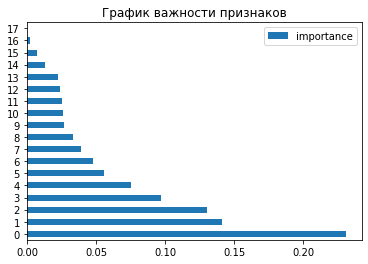

In [111]:
# в виде таблицы выведем признаки по значимости

importances = model_rf.feature_importances_

feature_list = list(features_test.columns)

feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

display(feature_results)

# в виде графика выведем признаки по значимости

feature_results.plot.barh(title='График важности признаков')



Анализируя портрет, хочется отметить, что самые важные показатели, влияющие на отказ от брони, стали количество дней от брони до заезда и гражданство постояльца.

array([[<AxesSubplot:title={'center':'lead_time'}>]], dtype=object)

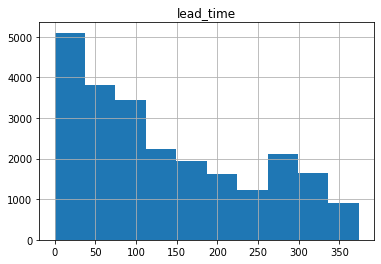

In [112]:
# проверим, за какое количество дней до заезда бронируют номер ненадежные клиенты чаще всего


hotel_train_clients = pd.read_csv('/datasets/hotel_train.csv')

hotel_train_clients_bad = hotel_train_clients[hotel_train_clients['is_canceled'] == 1]
                         
hotel_train_clients_bad.hist(column = 'lead_time', bins=10)

Ненадежные клиенты чаще всего бронируют номер от 0  до 40 дней до заезда, с небольшим отрывом - от 40 до 70 дней, и от 70 до 110 дней.


array([[<AxesSubplot:title={'center':'lead_time'}>]], dtype=object)

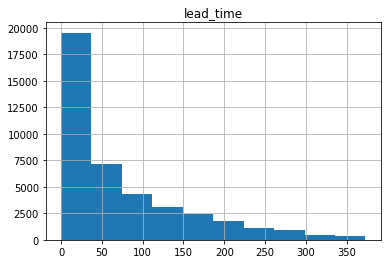

In [113]:
# проверим, за какое количество дней до заезда бронируют номер надежные клиенты чаще всего


hotel_train_clients = pd.read_csv('/datasets/hotel_train.csv')

hotel_train_clients_good = hotel_train_clients[hotel_train_clients['is_canceled'] == 0]
                         
hotel_train_clients_good.hist(column = 'lead_time', bins=10)

Надежные клиенты также в большинстве случаев бронируют номер от 0 до 40 дней до въезда, а в интервале от 40 до 70 дней бронируют почти в 3 раза меньше клиентов, за более долгий срок - еще меньше пользователей.

Таким образом, чем больше срок от брони до заезда, тем меньше вероятность подтверждения брони.

In [114]:
# проверим, какое гражданнство чаще всего имеет неблагонадежный клиент

hotel_train_clients_bad['country'].value_counts()

PRT    16604
ESP     1081
GBR      938
FRA      876
ITA      767
       ...  
MUS        1
IMN        1
AND        1
ALB        1
VGB        1
Name: country, Length: 112, dtype: int64

Самыми ненадежными клиентами стали граждане Португалии.

array([[<AxesSubplot:title={'center':'adults'}>]], dtype=object)

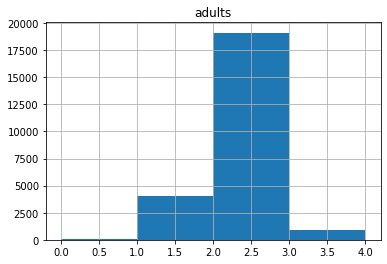

In [115]:
# проверим еще некоторые интересные признаки

# кол-во взрослых

hotel_train_clients_bad.hist(column = 'adults', bins=4)

array([[<AxesSubplot:title={'center':'adults'}>]], dtype=object)

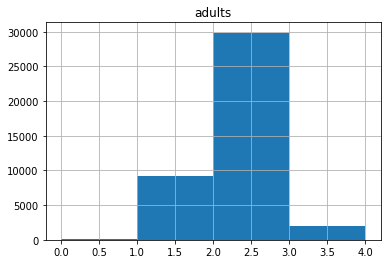

In [116]:
hotel_train_clients_good.hist(column = 'adults', bins=4)

Неблагонадежными чаще становятся пользователи, планирующие забронировать номер на двоих взрослых (таких в 4 раза больше, чем, тех, кто бронирует номер на 1 взрослого), среди надежных клиентов это соотношение отличается (номер на двоих бронируют в 3 раза чаще номера на одного)

array([[<AxesSubplot:title={'center':'children'}>]], dtype=object)

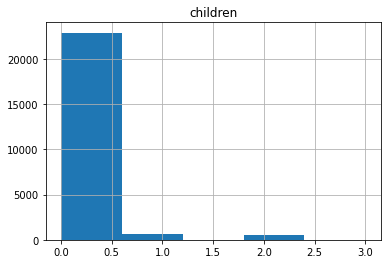

In [117]:
# кол-во детей

hotel_train_clients_bad.hist(column = 'children', bins=5)

array([[<AxesSubplot:title={'center':'children'}>]], dtype=object)

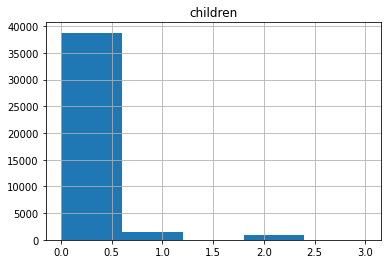

In [118]:
hotel_train_clients_good.hist(column = 'children', bins=5)

Наличие и отсутствие детей не оказывает влияние на благонадежность.

array([[<AxesSubplot:title={'center':'total_of_special_requests'}>]],
      dtype=object)

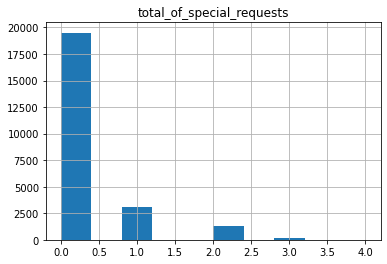

In [119]:
# кол-во специальных отметок

hotel_train_clients_bad.hist(column = 'total_of_special_requests', bins=10)

array([[<AxesSubplot:title={'center':'total_of_special_requests'}>]],
      dtype=object)

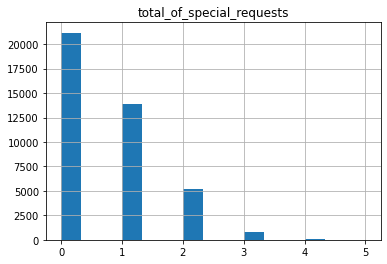

In [120]:
hotel_train_clients_good.hist(column = 'total_of_special_requests', bins=15)

Ненадежные клиенты чаще всего не имеют специальных отметок в заказе, в отличие от надежных.

array([[<AxesSubplot:title={'center':'required_car_parking_spaces'}>]],
      dtype=object)

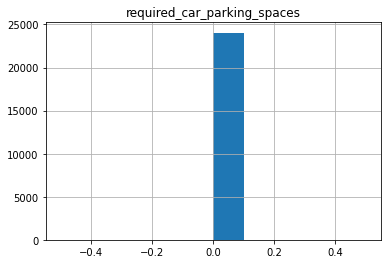

In [121]:
# необходимость места для автомобиля

hotel_train_clients_bad.hist(column = 'required_car_parking_spaces', bins=10)

array([[<AxesSubplot:title={'center':'required_car_parking_spaces'}>]],
      dtype=object)

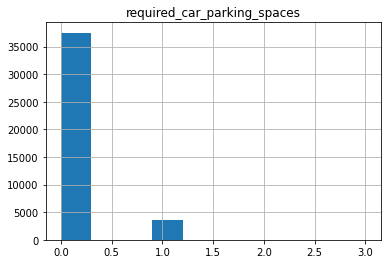

In [122]:
hotel_train_clients_good.hist(column = 'required_car_parking_spaces', bins=10)

Надежные клиенты чаще интересуются наличием места для авто, чем ненадежные.

### Шаг 6. Общий вывод

Использование модели для предсказания отказа от брони и внедрение депозитной системы принесет отелю прибыль 4_867_192 руб. Таким образом, разработка системы целесообразна. 

В качестве метрики качества была выбрана Полнота Recall, так как именно она лучше показывает долю истинноположительных предсказаний, которые принесут нам прибыль в размере 80% от понесенных убытков.
В нашем случае, самой качественной моделью стала модель логистической регрессии с максимальным количеством итерацией - 50 и алгоритмом liblinear, качество которой мы проверили кросс-валидацией с делением на 5 блоков.

Модель прошла успешную проверку  на тестовой выборке.

Что касается рекомендаций бизнесу, хотелось бы отметить следующее:

* менее половины клиентов подтверждают бронь и менее 25% повторно бронируют номер - стоит проанализировать отзывы об отеле и внести изменение согласно потребностям гостей

* наблюдаются очень большие сроки между датой брони и датой въезда, имеет смысл дополнительно уточнять у клиентов, точно ли они планируют приехать

* наблюдаются заявки, которые ожидали очень долгий срок подтверждения - проверить, в чем дело? неисправность в программе или ошибка менеджера

* в данных достаточно много аномальных значений (не менее 5%, например: 10 младенцев в номере и другие) - можно предложить добавить в программу максимально возможные значения, чтобы избежать такого разброса.

* Построив тепловую карту, мы увидели, что значительных зависимостей отмены брони нет ни с одним признаком, однако, стоит выделить признак lead_time (количество дней между датой бронирования и датой прибытия), этот признак более, чем остальные, оказывает влияние на целевой признак "отмена брони".

Самыми "ненадежными" клиентами стали граждане Португалии, бронирующие номер на двоих взрослых, в срок от 0 до 40 дней до въезда, не имеющие специальных отметок в заказе и не нуждающиеся в парковочном месте. 
В дополнение к сказанному, отметим, чем больше срок от брони до заезда, тем меньше вероятность подтверждения брони.